In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [45]:
import pickle
import numpy as np
import pickle
import numpy as np

def load_batch(filename):
    """Load a single batch of CIFAR-10."""
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']      # shape (10000, 3072)
        labels = batch[b'labels']  # list of length 10000
    # Reshape to (10000, 32, 32, 3)
    data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    return data, labels

def load_cifar10(path="cifar-10-batches-py"):
    """Load CIFAR-10 dataset in Keras style."""
    X_train, y_train = [], []
    
    # 5 training batches
    for i in range(1, 6):
        data, labels = load_batch(f"{path}/data_batch_{i}")
        X_train.append(data)
        y_train.extend(labels)
    
    X_train = np.concatenate(X_train)           # (50000, 32, 32, 3)
    y_train = np.array(y_train).reshape(-1, 1)  # (50000, 1)
    
    # test batch
    X_test, y_test = load_batch(f"{path}/test_batch")
    y_test = np.array(y_test).reshape(-1, 1)    # (10000, 1)
    
    return (X_train, y_train), (X_test, y_test)

# ✅ Now use like Keras
(X_train, y_train), (X_test, y_test) = load_cifar10()

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("First 5 labels:", y_train[:5].flatten())

X_train: (50000, 32, 32, 3)
y_train: (50000, 1)
X_test: (10000, 32, 32, 3)
y_test: (10000, 1)
First 5 labels: [6 9 9 4 1]


In [48]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1])

In [51]:
y_test = y_test.reshape(-1,)

In [53]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [36]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

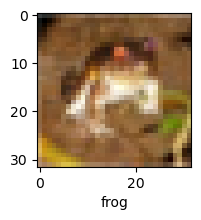

In [57]:
plot_sample(X_train, y_train, 0)

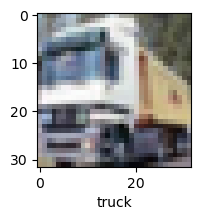

In [60]:
plot_sample(X_train, y_train, 1)

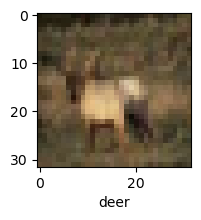

In [62]:
plot_sample(X_train, y_train, 3)

In [66]:
X_train = X_train/255
X_test = X_test/255

In [71]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

# IT GIVES VERY BAD RESULT

D:\Apps_Download\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3537 - loss: 1.8132
Epoch 2/5
  81/1563 ━━━━━━━━━━━━━━━━━━━━ 1:15 51ms/step - accuracy: 0.3838 - loss: 1.6999

KeyboardInterrupt: 

In [76]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

D:\Apps_Download\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.4766 - loss: 1.4607
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6161 - loss: 1.0955
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6696 - loss: 0.9537
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6981 - loss: 0.8654
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7233 - loss: 0.7955
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7458 - loss: 0.7324
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.7627 - loss: 0.6821
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7821 - loss: 0.6295
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7932 - loss: 0.5909
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8081 - loss: 0.5493


In [85]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7062 - loss: 0.9314


[0.9313762784004211, 0.7062000036239624]

In [88]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[6.06365065e-05, 8.76510785e-06, 2.30012534e-04, 9.65787709e-01,
        7.99075176e-04, 3.07551958e-02, 2.23061466e-03, 6.21171566e-05,
        6.31114817e-05, 2.63567085e-06],
       [2.52298458e-04, 5.71264066e-02, 6.25344171e-07, 3.47136904e-07,
        1.71941199e-08, 1.32498652e-08, 4.29698455e-09, 1.15561418e-08,
        9.42611396e-01, 8.84020938e-06],
       [5.53912781e-02, 1.99313313e-01, 4.91092121e-03, 7.31617399e-03,
        9.29337170e-04, 1.52429827e-02, 3.15802579e-04, 1.76757283e-03,
        6.89655602e-01, 2.51571126e-02],
       [4.37137216e-01, 3.36793698e-02, 1.40415225e-02, 5.04442956e-03,
        1.13830566e-02, 3.93334776e-05, 3.05266865e-03, 8.57381892e-05,
        4.95484561e-01, 5.21689471e-05],
       [3.50677070e-08, 2.29553134e-05, 2.95072552e-02, 2.50983126e-02,
        3.52158576e-01, 1.05994579e-03, 5.92124462e-01, 3.18398975e-06,
        2.50004723e-05, 3.00553751e-07]], dtype=float32)

In [91]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [94]:
y_test[:5]

array([3, 8, 8, 0, 6])

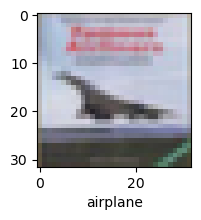

In [97]:
plot_sample(X_test, y_test,3)

In [101]:
classes[y_classes[3]]

'ship'